In [1]:
!mkdir -p ds_your_name/{csv_files,outputs}

!tree ds_your_name

/bin/bash: line 1: tree: command not found


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Fear Greed Dataset

In [16]:
fear_greed_df = pd.read_csv('fear_greed_index.csv')
fear_greed_df.head()


,timestamp,value,classification,date,date_only
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


## Data Cleaning for Fear Greed Dataset





In [17]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
fear_greed_df['date_only'] = fear_greed_df['date'].dt.date

fear_greed_df['classification'] = fear_greed_df['classification'].str.strip()

print("Data Overview:")
print(fear_greed_df.head())
print("\nValue Counts by Classification:")
print(fear_greed_df['classification'].value_counts())

fear_greed_df.to_csv('fear_greed_index.csv', index=False)

Data Overview:
    timestamp  value classification       date   date_only
0  1517463000     30           Fear 2018-02-01  2018-02-01
1  1517549400     15   Extreme Fear 2018-02-02  2018-02-02
2  1517635800     40           Fear 2018-02-03  2018-02-03
3  1517722200     24   Extreme Fear 2018-02-04  2018-02-04
4  1517808600     11   Extreme Fear 2018-02-05  2018-02-05

Value Counts by Classification:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


## Load Historical Dataset

In [21]:
 historical_df = pd.read_csv('historical_data.csv')
 historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## Data Cleaning for Historical Dataset

In [41]:

timestamp_col = 'Timestamp IST' if 'Timestamp IST' in historical_df.columns else 'Timestamp'

try:
    historical_df[timestamp_col] = pd.to_datetime(
        historical_df[timestamp_col],
        format='%d-%m-%Y %H:%M',
        dayfirst=True
    )
    historical_df['date_only'] = historical_df[timestamp_col].dt.date
    print("Timestamp conversion successful")
except Exception as e:
    print("Timestamp conversion failed:", str(e))
    raise

numeric_cols = ['Size USD', 'Closed PnL']
for col in numeric_cols:
    if col in historical_df.columns:
        historical_df[col] = (
            historical_df[col]
            .astype(str)
            .str.replace(',', '')
            .replace('', np.nan)
            .astype(float)
        )
        if historical_df[col].lt(0).any():
            print(f"Found accounting-style negatives in {col}")

if 'Closed PnL' in historical_df.columns:
    historical_df['absolute_pnl'] = historical_df['Closed PnL'].abs()
    historical_df['trade_result'] = np.where(
        historical_df['Closed PnL'] > 0, 'Profit', 'Loss'
    )

print("\nTrading Data Overview:")
print(historical_df.head())
print("\nTrade Side Distribution:")
print(historical_df['Side'].value_counts())


historical_df.to_csv('ds_your_name/csv_files/cleaned_trading.csv', index=False)
print("Data cleaned and saved successfully")

Timestamp conversion successful
Found accounting-style negatives in Closed PnL

Trading Data Overview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521    

## Merge Datasets and Create Analysis DataFrame

In [45]:
daily_trading = historical_df.groupby('date_only').agg({
    'Closed PnL': ['sum', 'mean', 'count'],
    'Size USD': 'sum',
    'absolute_pnl': 'mean'
}).reset_index()

daily_trading.columns = ['date_only', 'total_pnl', 'avg_pnl', 'trade_count', 'total_volume', 'avg_abs_pnl']

merged_df = pd.merge(daily_trading, fear_greed_df, on='date_only', how='left')



merged_df['pnl_per_trade'] = merged_df['total_pnl'] / merged_df['trade_count']
merged_df['volume_per_trade'] = merged_df['total_volume'] / merged_df['trade_count']


print("\nMerged Data Overview:")
print(merged_df.head())
print("\nMissing sentiment data for dates:", merged_df[merged_df['classification'].isna()]['date_only'].tolist())


merged_df.to_csv('ds_your_name/csv_files/merged_data.csv', index=False)
print("Merged data saved successfully")


Merged Data Overview:
    date_only   total_pnl    avg_pnl  trade_count  total_volume  avg_abs_pnl  \
0  2023-05-01    0.000000   0.000000            3        477.00     0.000000   
1  2023-12-05    0.000000   0.000000            9      50005.83     0.000000   
2  2023-12-14 -205.434737 -18.675885           11     113203.35    77.184684   
3  2023-12-15  -24.632034 -12.316017            2      10609.95    12.316017   
4  2023-12-16    0.000000   0.000000            3      15348.77     0.000000   

      timestamp  value classification       date  pnl_per_trade  \
0  1.682919e+09   63.0          Greed 2023-05-01       0.000000   
1  1.701754e+09   75.0  Extreme Greed 2023-12-05       0.000000   
2  1.702532e+09   72.0          Greed 2023-12-14     -18.675885   
3  1.702618e+09   70.0          Greed 2023-12-15     -12.316017   
4  1.702705e+09   67.0          Greed 2023-12-16       0.000000   

   volume_per_trade  
0        159.000000  
1       5556.203333  
2      10291.213636  
3    

## Exploratory Data Analysis

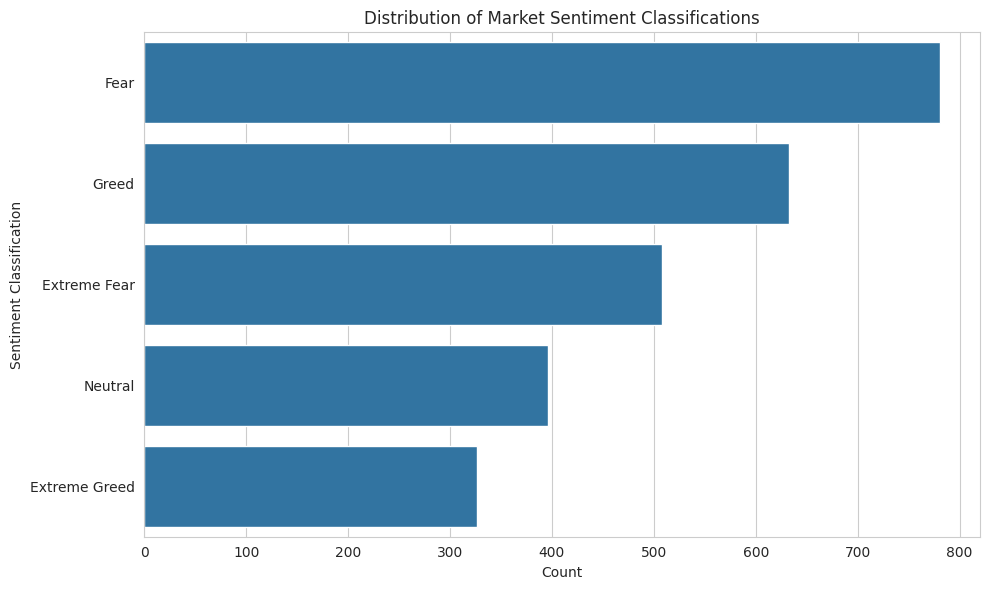

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=fear_greed_df, y='classification', order=fear_greed_df['classification'].value_counts().index)
plt.title('Distribution of Market Sentiment Classifications')
plt.xlabel('Count')
plt.ylabel('Sentiment Classification')
plt.tight_layout()
plt.savefig('ds_your_name/outputs/sentiment_distribution.png')
plt.show()

## Trade Performance by Sentiment

/tmp/ipython-input-378481484.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='total_volume',
/tmp/ipython-input-378481484.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='trade_count',


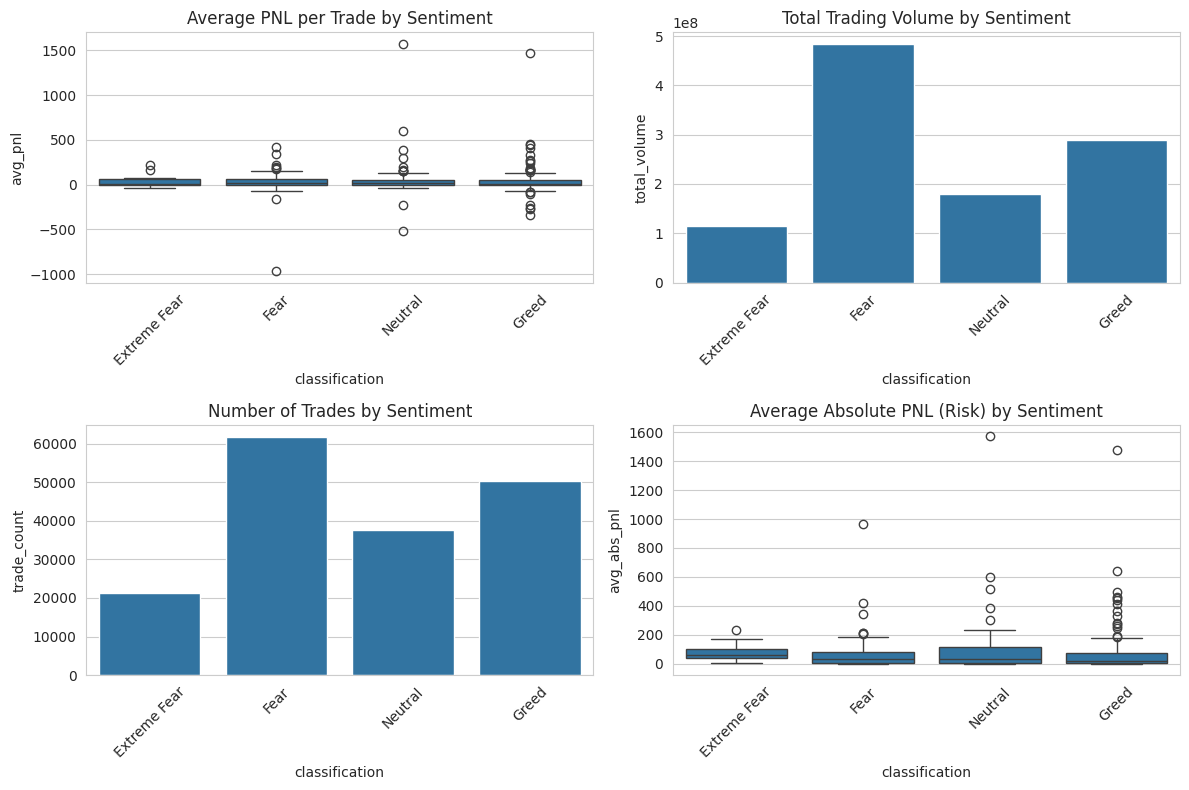

In [28]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=merged_df, x='classification', y='avg_pnl',
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed'])
plt.title('Average PNL per Trade by Sentiment')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(data=merged_df, x='classification', y='total_volume',
            estimator=np.sum, ci=None,
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed'])
plt.title('Total Trading Volume by Sentiment')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.barplot(data=merged_df, x='classification', y='trade_count',
            estimator=np.sum, ci=None,
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed'])
plt.title('Number of Trades by Sentiment')
plt.xticks(rotation=45)


plt.subplot(2, 2, 4)
sns.boxplot(data=merged_df, x='classification', y='avg_abs_pnl',
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed'])
plt.title('Average Absolute PNL (Risk) by Sentiment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('ds_your_name/outputs/trading_by_sentiment.png')
plt.show()

## Profitability Analysis

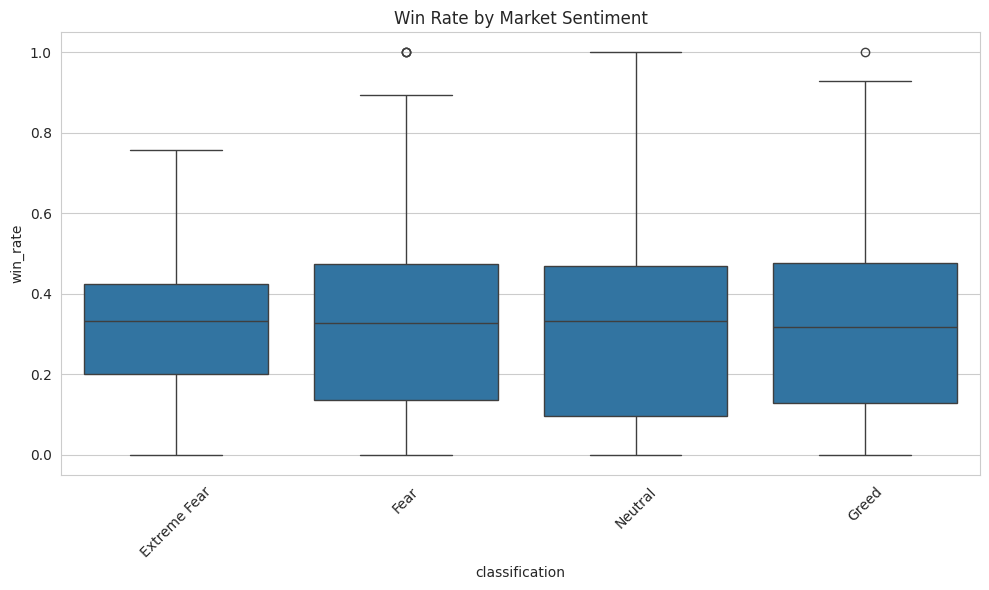

In [29]:
win_rates = historical_df.groupby(['date_only', 'trade_result']).size().unstack().fillna(0)
win_rates['win_rate'] = win_rates['Profit'] / (win_rates['Profit'] + win_rates['Loss'])
win_rates = win_rates.reset_index()

win_rates = pd.merge(win_rates, fear_greed_df[['date_only', 'classification']], on='date_only', how='left')

plt.figure(figsize=(10, 6))
sns.boxplot(data=win_rates, x='classification', y='win_rate',
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed'])
plt.title('Win Rate by Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ds_your_name/outputs/win_rate_by_sentiment.png')
plt.show()

## Sentiment Correlation

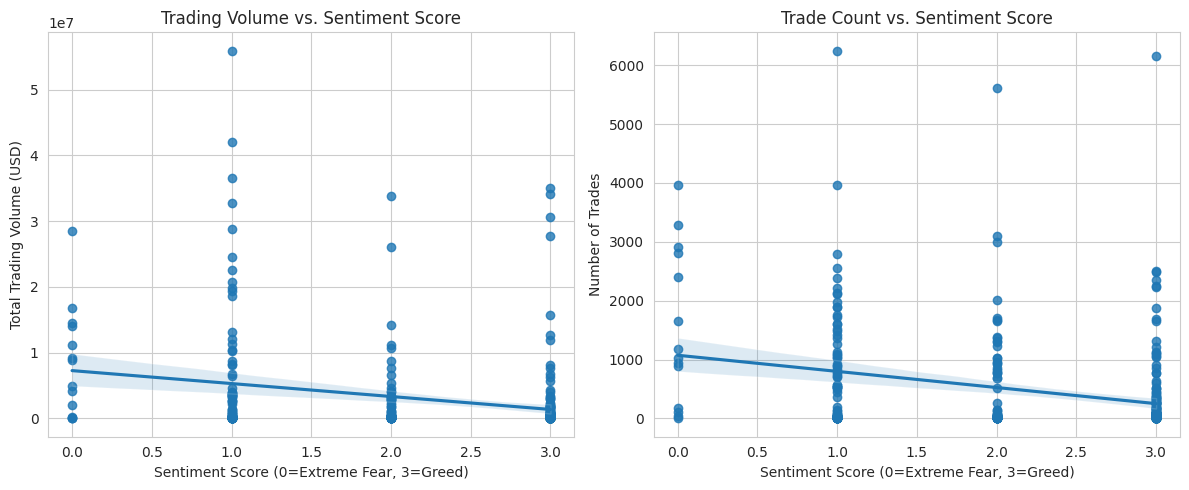


Correlation between sentiment and trading volume: -0.26
Correlation between sentiment and trade count: -0.29


In [33]:

sentiment_order = {'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3}
merged_df['sentiment_score'] = merged_df['classification'].map(sentiment_order)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.regplot(data=merged_df, x='sentiment_score', y='total_volume')
plt.title('Trading Volume vs. Sentiment Score')
plt.xlabel('Sentiment Score (0=Extreme Fear, 3=Greed)')
plt.ylabel('Total Trading Volume (USD)')


plt.subplot(1, 2, 2)
sns.regplot(data=merged_df, x='sentiment_score', y='trade_count')
plt.title('Trade Count vs. Sentiment Score')
plt.xlabel('Sentiment Score (0=Extreme Fear, 3=Greed)')
plt.ylabel('Number of Trades')

plt.tight_layout()
plt.savefig('ds_your_name/outputs/volume_sentiment_correlation.png')
plt.show()


volume_corr = merged_df['sentiment_score'].corr(merged_df['total_volume'])
count_corr = merged_df['sentiment_score'].corr(merged_df['trade_count'])
print(f"\nCorrelation between sentiment and trading volume: {volume_corr:.2f}")
print(f"Correlation between sentiment and trade count: {count_corr:.2f}")

## Time Series Analysis

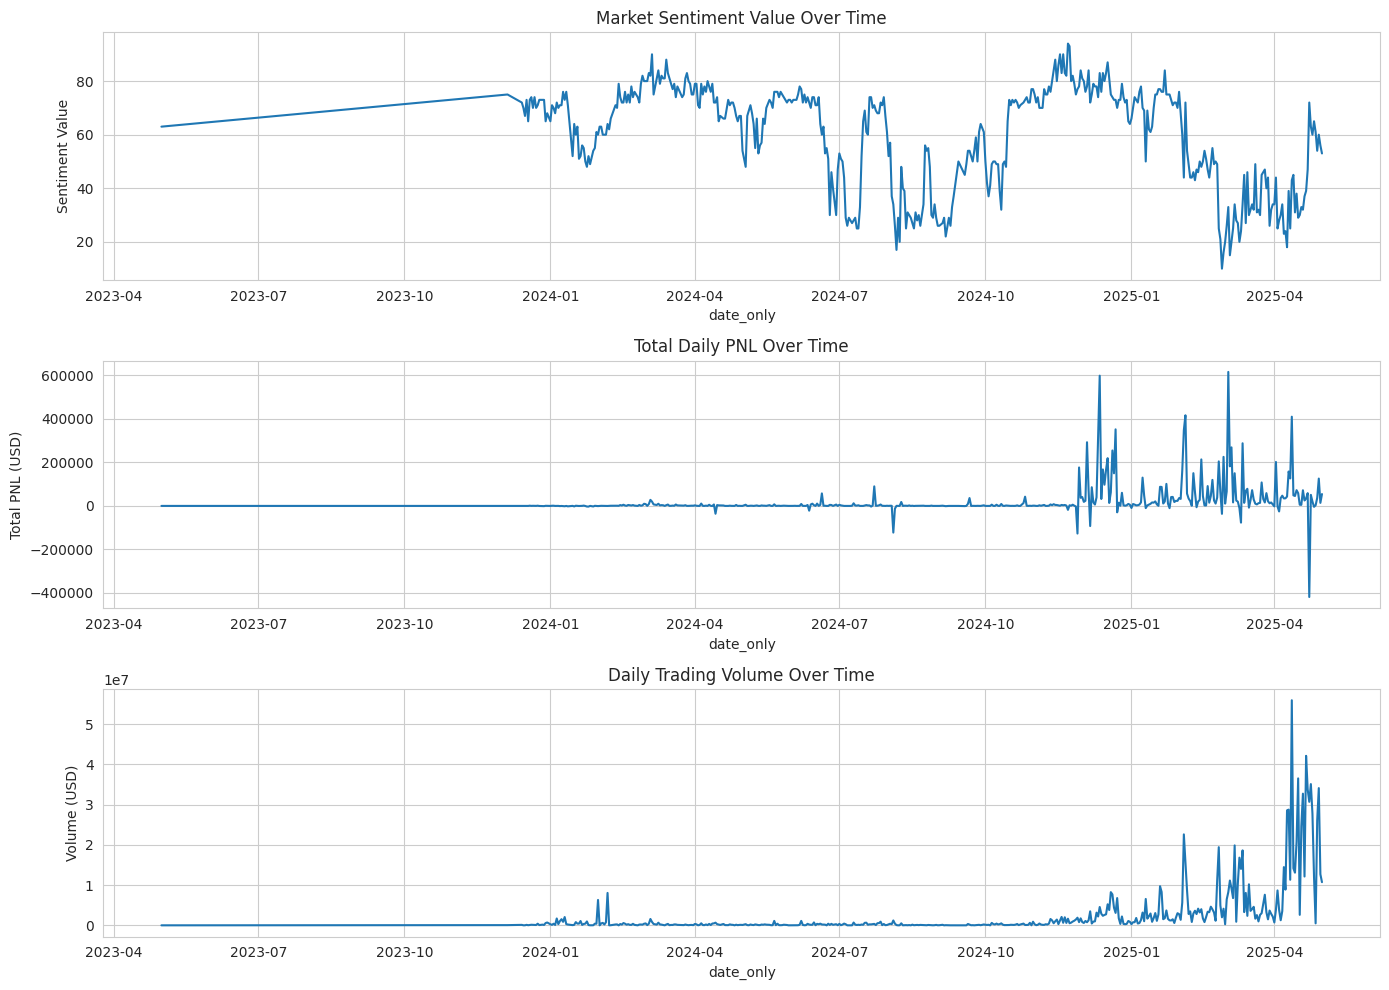

In [34]:
plt.figure(figsize=(14, 10))


plt.subplot(3, 1, 1)
sns.lineplot(data=merged_df, x='date_only', y='value')
plt.title('Market Sentiment Value Over Time')
plt.ylabel('Sentiment Value')

plt.subplot(3, 1, 2)
sns.lineplot(data=merged_df, x='date_only', y='total_pnl')
plt.title('Total Daily PNL Over Time')
plt.ylabel('Total PNL (USD)')


plt.subplot(3, 1, 3)
sns.lineplot(data=merged_df, x='date_only', y='total_volume')
plt.title('Daily Trading Volume Over Time')
plt.ylabel('Volume (USD)')

plt.tight_layout()
plt.savefig('ds_your_name/outputs/time_series_analysis.png')
plt.show()

## Statistical Testing

In [35]:
from scipy import stats

extreme_fear = merged_df[merged_df['classification'] == 'Extreme Fear']['avg_pnl']
fear = merged_df[merged_df['classification'] == 'Fear']['avg_pnl']
neutral = merged_df[merged_df['classification'] == 'Neutral']['avg_pnl']
greed = merged_df[merged_df['classification'] == 'Greed']['avg_pnl']

f_stat, p_value = stats.f_oneway(extreme_fear, fear, neutral, greed)

print("\nStatistical Test Results:")
print(f"ANOVA test for difference in average PNL across sentiment groups:")
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference in average PNL across sentiment groups.")
else:
    print("No statistically significant difference in average PNL across sentiment groups.")


Statistical Test Results:
ANOVA test for difference in average PNL across sentiment groups:
F-statistic: 0.62, p-value: 0.6019
No statistically significant difference in average PNL across sentiment groups.


## Final Report

In [38]:

print("Available columns in merged_df:", merged_df.columns.tolist())

stats_config = {
    'avg_pnl': ['mean', 'std'],
    'total_volume': 'mean',
    'trade_count': 'mean',
    'avg_abs_pnl': 'mean'
}


valid_stats = {k: v for k, v in stats_config.items() if k in merged_df.columns}

summary_stats = merged_df.groupby('classification').agg(valid_stats).reset_index()

if isinstance(summary_stats.columns, pd.MultiIndex):
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
else:
    summary_stats.columns = [col.replace(' ', '_') for col in summary_stats.columns]

if 'trade_result' in merged_df.columns:
    win_rates = merged_df.groupby(['classification', 'trade_result']).size().unstack()
    win_rates['win_rate'] = win_rates['Profit'] / (win_rates['Profit'] + win_rates['Loss'])
    summary_stats = summary_stats.merge(win_rates['win_rate'], on='classification')

print("\nSummary Statistics:")
print(summary_stats)


summary_stats.to_csv('ds_your_name/csv_files/summary_statistics.csv', index=False)
print("Summary statistics saved successfully.")

Available columns in merged_df: ['date_only', 'total_pnl', 'avg_pnl', 'trade_count', 'total_volume', 'avg_abs_pnl', 'timestamp', 'value', 'classification', 'date', 'pnl_per_trade', 'volume_per_trade', 'sentiment_score']

Summary Statistics:
  classification_  avg_pnl_mean  avg_pnl_std  total_volume_mean  \
0    Extreme Fear     38.433903    74.222359       8.177447e+06   
1   Extreme Greed     56.736108   117.423744       1.091800e+06   
2            Fear     31.276567   129.547847       5.311261e+06   
3           Greed     39.412175   136.170140       1.495246e+06   
4         Neutral     63.820699   225.336392       2.690180e+06   

   trade_count_mean  avg_abs_pnl_mean  
0       1528.571429         77.945369  
1        350.807018         70.093397  
2        679.527473         67.263619  
3        260.637306         66.132156  
4        562.477612         99.550634  
Summary statistics saved successfully.
